In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
# !pip install pandas-datareader
from pandas_datareader import data, wb

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

### Loading Data

In [4]:
start = dt.date(2008,1,1)
end = dt.date.today()

In [5]:
BAC  = data.DataReader("BAC", 'yahoo', start, end)
Citi = data.DataReader("C", 'yahoo', start, end)
GS   = data.DataReader("GS", 'yahoo', start, end)
JPM  = data.DataReader("JPM", 'yahoo', start, end)
MS   = data.DataReader("MS", 'yahoo', start, end)
USB  = data.DataReader("USB", 'yahoo', start, end)
WFS  = data.DataReader("WFC", 'yahoo', start, end)

In [6]:
BAC.info(), Citi.info() #, GS.info(), JPM.info(), MS.info(), USB.info(), WFS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2008-01-02 to 2021-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3463 non-null   float64
 1   Low        3463 non-null   float64
 2   Open       3463 non-null   float64
 3   Close      3463 non-null   float64
 4   Volume     3463 non-null   float64
 5   Adj Close  3463 non-null   float64
dtypes: float64(6)
memory usage: 189.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3463 entries, 2008-01-02 to 2021-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3463 non-null   float64
 1   Low        3463 non-null   float64
 2   Open       3463 non-null   float64
 3   Close      3463 non-null   float64
 4   Volume     3463 non-null   float64
 5   Adj Close  3463 non-null   float64
dtypes: float64(6)
memory usage: 189.4 KB


(None, None)

In [7]:
Citi.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2008-01-02  298.899994  288.500000  297.299988  289.200012  6214650.0   
2008-01-03  293.899994  288.899994  292.200012  289.299988  5965790.0   
2008-01-04  290.299988  280.399994  286.100006  282.399994  7545430.0   
2008-01-07  287.600006  279.299988  283.399994  282.600006  6891880.0   
2008-01-08  287.000000  270.100006  284.600006  271.399994  9998940.0   

             Adj Close  
Date                    
2008-01-02  237.015762  
2008-01-03  237.097672  
2008-01-04  231.442673  
2008-01-07  231.606644  
2008-01-08  222.427597

In [8]:
Citi.tail()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-09-27  72.610001  71.750000  71.849998  72.260002  19857500.0  72.260002
2021-09-28  73.279999  71.239998  72.470001  71.370003  20835000.0  71.370003
2021-09-29  71.820000  70.980003  71.690002  71.529999  13683900.0  71.529999
2021-09-30  71.699997  69.949997  71.629997  70.180000  22090900.0  70.180000
2021-10-01  71.680000  70.089996  70.440002  71.180000  16363507.0  71.180000

In [9]:
bank_stocks = pd.concat([BAC, Citi, GS, JPM, MS, USB, WFS], axis=1, keys =  ['BAC','Citi','GS','JPM','MS','USB', 'WFS'])
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
bank_stocks.columns[0:10]

MultiIndex([( 'BAC',      'High'),
            ( 'BAC',       'Low'),
            ( 'BAC',      'Open'),
            ( 'BAC',     'Close'),
            ( 'BAC',    'Volume'),
            ( 'BAC', 'Adj Close'),
            ('Citi',      'High'),
            ('Citi',       'Low'),
            ('Citi',      'Open'),
            ('Citi',     'Close')],
           names=['Bank Ticker', 'Stock Info'])

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2008-01-02   41.549999  40.349998  41.529999  40.560001  30764600.0   
2008-01-03   40.810001  40.250000  40.630001  40.299999  22589500.0   
2008-01-04   40.290001  39.759998  40.000000  39.849998  34921700.0   
2008-01-07   40.240002  39.259998  40.049999  39.900002  31884400.0   
2008-01-08   40.209999  38.279999  40.180000  38.410000  42143300.0   

Bank Ticker                   Citi                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2008-01-02   32.199280  298.899994  288.500000  297.299988  289.200012  ...   
2008-01-03   31.992872  293.899994  288.899994  292.200012  289.299988  ...   
2008-01-04   31.635628  290.299988  280.399994  286.100006  282.399994  ...   
2008-01-07   31.675329  287.600006  279.299988  283.399994  282.600006  ...   
2008-01-08   30.492458  287.000000  270.100006  284.600006  271.399994  ...   

Bank Ticker        USB                                          WFS  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2008-01-02   31.790001  31.180000  10623900.0  21.769829  30.480000   
2008-01-03   31.340000  30.330000  13995100.0  21.176359  29.370001   
2008-01-04   30.120001  29.440001  14328700.0  20.554970  28.320000   
2008-01-07   29.670000  29.709999  12090300.0  20.743477  28.040001   
2008-01-08   29.920000  28.440001  16178000.0  19.856762  28.110001   

Bank Ticker                                                      
Stock Info         Low       Open  Close      Volume  Adj Close  
Date                                                             
2008-01-02   28.980000  30.480000  29.10  24387800.0  19.991011  
2008-01-03   28.170000  29.250000  28.52  26313100.0  19.592560  
2008-01-04   26.990000  28.250000  27.49  50818700.0  18.884979  
2008-01-07   27.110001  27.700001  27.68  25887100.0  19.015505  
2008-01-08   26.370001  27.870001  26.50  41495200.0  18.204874  

[5 rows x 42 columns]

### EDA

In [12]:
price_close = bank_stocks.xs(key='Adj Close', axis=1, level='Stock Info')
price_close.head()

Bank Ticker        BAC        Citi          GS        JPM         MS  \
Date                                                                   
2008-01-02   32.199280  237.015762  170.724380  30.024557  39.485207   
2008-01-03   31.992872  237.097672  168.454666  29.818098  39.477436   
2008-01-04   31.635628  231.442673  164.416794  29.141695  38.206467   
2008-01-07   31.675329  231.606644  160.140533  29.433626  37.439251   
2008-01-08   30.492458  222.427597  155.839478  28.265957  35.959026   

Bank Ticker        USB        WFS  
Date                               
2008-01-02   21.769829  19.991011  
2008-01-03   21.176359  19.592560  
2008-01-04   20.554970  18.884979  
2008-01-07   20.743477  19.015505  
2008-01-08   19.856762  18.204874

In [13]:
price_close.max()

Bank Ticker
BAC      43.259998
Citi    246.151627
GS      417.660553
JPM     167.130005
MS      105.449997
USB      61.285744
WFS      58.635166
dtype: float64

In [14]:
price_change_pct = price_close.pct_change(periods=1)
price_change_pct.head()

Bank Ticker       BAC      Citi        GS       JPM        MS       USB  \
Date                                                                      
2008-01-02        NaN       NaN       NaN       NaN       NaN       NaN   
2008-01-03  -0.006410  0.000346 -0.013295 -0.006876 -0.000197 -0.027261   
2008-01-04  -0.011166 -0.023851 -0.023970 -0.022684 -0.032195 -0.029344   
2008-01-07   0.001255  0.000708 -0.026009  0.010018 -0.020081  0.009171   
2008-01-08  -0.037344 -0.039632 -0.026858 -0.039671 -0.039537 -0.042747   

Bank Ticker       WFS  
Date                   
2008-01-02        NaN  
2008-01-03  -0.019932  
2008-01-04  -0.036115  
2008-01-07   0.006912  
2008-01-08  -0.042630

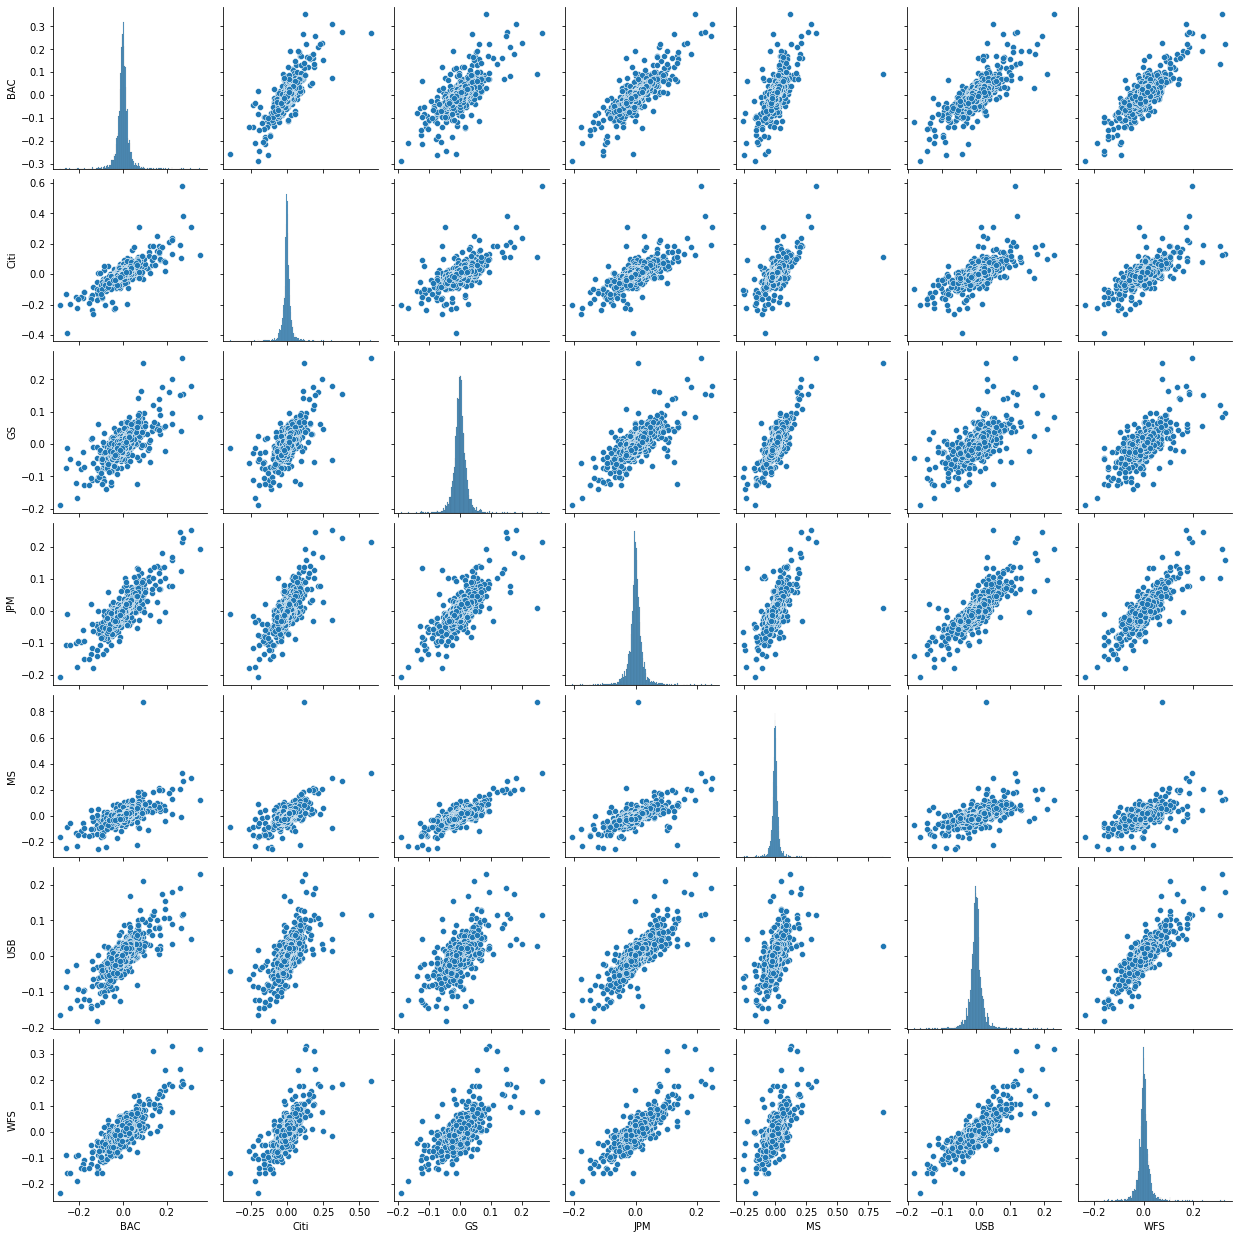

In [15]:
sns.pairplot(price_change_pct, diag_kind = 'hist')

In [16]:
pd.concat([price_change_pct.min(), price_change_pct.idxmin(), price_change_pct.max(), price_change_pct.idxmax()],
          axis=1,
          keys=['Min', 'Min_Dt', 'Max', 'Max_dt'])

Min     Min_Dt       Max     Max_dt
Bank Ticker                                          
BAC         -0.289693 2009-01-20  0.352692 2009-04-09
Citi        -0.390244 2009-02-27  0.578249 2008-11-24
GS          -0.189596 2009-01-20  0.264678 2008-11-24
JPM         -0.207274 2009-01-20  0.250968 2009-01-21
MS          -0.258929 2008-10-09  0.869836 2008-10-13
USB         -0.181653 2009-03-05  0.228412 2009-04-09
WFS         -0.238223 2009-01-20  0.327645 2008-07-16

In [17]:
pd.concat([price_change_pct.std()*np.sqrt(252)*100, price_change_pct.mean()*252*100], axis=1, keys=['Std (annual, in %age)', 'Mean (annual, in %age)'])

Std (annual, in %age)  Mean (annual, in %age)
Bank Ticker                                               
BAC                      53.791634               16.491488
Citi                     56.701271                7.167141
GS                       38.150389               13.035921
JPM                      41.166413               20.879638
MS                       54.392086               20.521877
USB                      37.442010               14.453194
WFS                      45.558460               16.381961

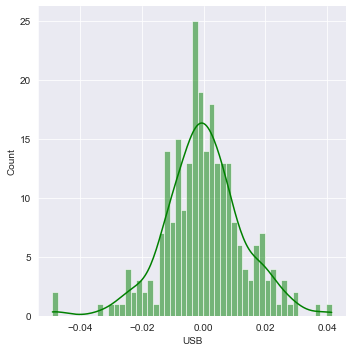

In [18]:
sns.set_style('darkgrid')
sns.displot(x=price_change_pct.query('2015 <index < 2016')['USB'], bins=50, kde=True, color='green')

In [19]:
# price_change_pct.loc['2015-01-01':'2016-01-01'].head()

### Visualizations

In [20]:
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
fig = px.line(data_frame=price_close, labels={'value':'Prices'}, title='Stock Prices')
fig

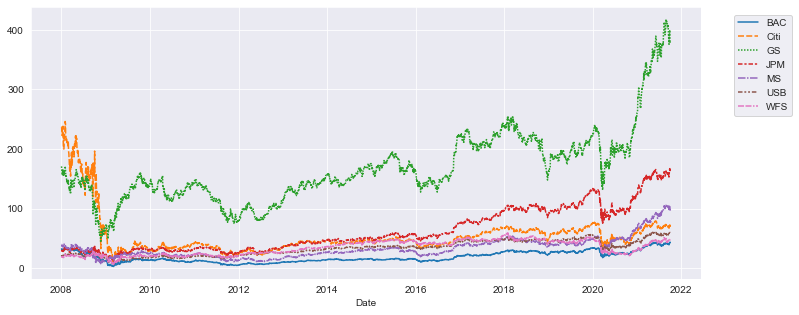

In [22]:
plt.figure(figsize=(12,5))
sns.lineplot(data=price_close, ls='-')
plt.legend(loc=(1.05, 0.6))

In [23]:
USB_df = pd.concat([price_close['USB'],price_close['USB'].rolling(30).mean()], axis=1, keys=['USB', '30DMA'])
USB_df.tail()

USB      30DMA
Date                            
2021-09-27  60.634823  56.515427
2021-09-28  59.959999  56.609703
2021-09-29  60.259998  56.740775
2021-09-30  59.439999  56.867999
2021-10-01  60.759998  57.062709

<AxesSubplot:xlabel='Date'>

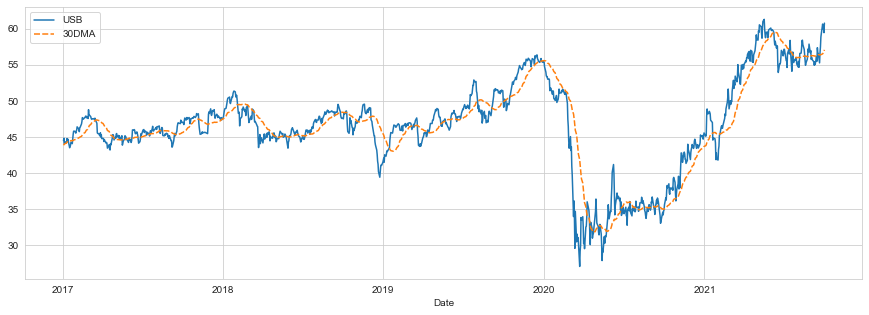

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.lineplot(data=USB_df.query('Date > 2017'))

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

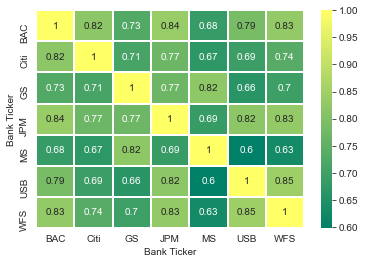

In [25]:
sns.heatmap(price_change_pct.corr(), cmap='summer', lw=1, annot=True)

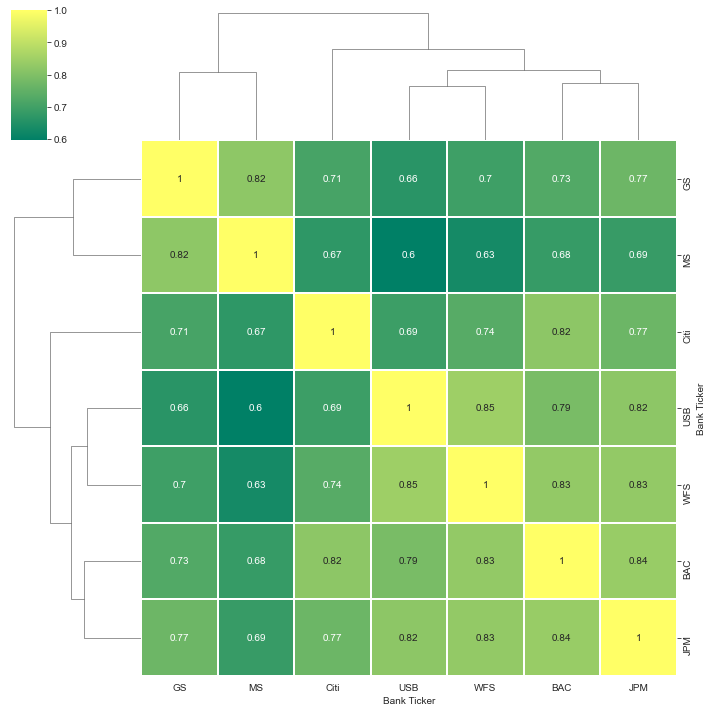

In [26]:
sns.clustermap(price_change_pct.corr(), cmap='summer', lw=1, annot=True)

In [27]:
import plotly.graph_objects as go

In [30]:
fig = go.Figure(go.Candlestick(x     = bank_stocks.query('index >2020').index
                              ,open  = bank_stocks.query('index >2020')['USB', 'Open']
                              ,high  = bank_stocks.query('index >2020')['USB', 'High']
                              ,low   = bank_stocks.query('index >2020')['USB', 'Low']
                              ,close = bank_stocks.query('index >2020')['USB', 'Close']
                              ))
fig

In [32]:
import cufflinks as cf
cf.go_offline()

In [35]:
USB.loc['2019-01-01':, 'Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [36]:
USB.loc['2019-01-01':, 'Close'].ta_plot(study='boll')